In [45]:
import pandas as pd
import datetime
import numpy as np

In [46]:
wines_ = pd.read_excel("data/Subset1.xls", 1)
print(min(wines_['DOY']))

213.0


On ne peut donc au maximum prendre comme data que les 213 jours précédent la récolte, une information supplémentaire n'est probablement pas importante car on va surtout analyser l'effet de la météo d'une année sur le vin

In [47]:
wines_.dropna(subset = ['Harvest date'], inplace=True)
wines_.reset_index(drop=True, inplace=True)

In [48]:
weather = pd.read_excel("data/Subset3.xls", [1,2,3,4,5])
weather[1]

,Year,Month,day,Tave,Tmax,Tmin,DOY,Unnamed: 7,Year.1,GST,WI,HI
0,1911,1,1,8.35,16.7,0.0,1,NaN,1911.0,15.073364,1099.050000,967.254052
1,1911,1,2,8.85,19.4,-1.7,2,NaN,1912.0,15.752336,1246.550000,1146.450272
2,1911,1,3,6.65,16.1,-2.8,3,NaN,1913.0,16.722430,1446.300000,1276.779404
3,1911,1,4,8.30,18.3,-1.7,4,NaN,1914.0,15.678579,1217.966001,1103.276910
4,1911,1,5,7.80,18.9,-3.3,5,NaN,1915.0,15.950196,1277.291993,1133.617078
...,...,...,...,...,...,...,...,...,...,...,...,...
36885,2011,12,27,6.95,15.6,-1.7,361,NaN,NaN,NaN,NaN,NaN
36886,2011,12,28,11.65,19.4,3.9,362,NaN,NaN,NaN,NaN,NaN
36887,2011,12,29,11.15,16.7,5.6,363,NaN,NaN,NaN,NaN,NaN
36888,2011,12,30,12.20,15.0,9.4,364,NaN,NaN,NaN,NaN,NaN


In [49]:
i = list(range(1,201))
i = list(map(str, i))
temperatures = pd.DataFrame(columns = i)
temperatures

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200


In [50]:
wines = wines_.copy()

In [51]:
for i in range(len(wines)):
    new_row = []
    r = wines["Reg"][i]
    d = wines['Harvest date'][i]
    h = int(wines['DOY'][i])
    new_row = list(weather[r].loc[(weather[r]['Year'] == d.year) & (weather[r]['DOY'].isin(range(h-200,h)))]['Tave'])
    if len(new_row) != 200:
        new_row = [float('nan')] * 200
    temperatures.loc[len(temperatures)] = new_row
print(temperatures.isnull().sum(axis = 0))

1      102
2      102
3      102
4      102
5      102
      ... 
196    102
197    102
198    102
199    102
200    102
Length: 200, dtype: int64


In [52]:
# Use pandas get_dummies() function to one-hot encode the 'fruits' column
one_hot_data = pd.get_dummies(wines['Cultivar'])

# Concatenate the one-hot encoded DataFrame with the original DataFrame
dataset2 = pd.concat([wines, one_hot_data], axis=1)

# Drop the original 'fruits' column
dataset2.drop('Cultivar', axis=1, inplace=True)

# Print the resulting DataFrame with one-hot encoded column
dataset2

,Table.No.,Color,Recommend,RecReg,Reg,Harvest date,DOY,Must.Brix,Must.Tacid,Must.pH,...,Trousseau,Valdepes,Verccia Sarda,Verccia bianca,Verdelho,Vermentino Favorita,Walschriesling,White Riesling,Zinfandel,sa Veltliner
0,9,White,Particularly recommended,1.0,3,1936-09-08,251.0,27.2,0.54,3.88,...,False,False,False,False,False,False,False,False,False,False
1,9,White,Particularly recommended,1.0,4,1936-08-31,243.0,23.5,0.67,3.79,...,False,False,False,False,False,False,False,False,False,False
2,9,White,Particularly recommended,1.0,1,1937-10-01,273.0,22.1,0.72,3.38,...,False,False,False,False,False,False,False,False,False,False
3,9,White,Particularly recommended,1.0,3,1937-09-11,253.0,24.6,0.63,3.69,...,False,False,False,False,False,False,False,False,False,False
4,9,White,Particularly recommended,1.0,1,1938-09-14,256.0,19.8,0.78,3.19,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,25,Red,Table grape,NaN,4,1937-10-25,297.0,21.8,0.47,3.74,...,False,False,False,False,False,False,False,False,False,False
1469,25,Red,Table grape,NaN,4,1940-10-07,280.0,22.7,0.36,3.90,...,False,False,False,False,False,False,False,False,False,False
1470,25,Red,Table grape,NaN,4,1935-11-01,304.0,20.2,0.55,NaN,...,False,False,False,False,False,False,False,False,False,False
1471,25,Red,Table grape,NaN,4,1937-10-13,285.0,17.6,0.50,3.58,...,False,False,False,False,False,False,False,False,False,False


### dataset2 ne sera probablement pas utile. En effet on augmente beaucoup trop la dimension par rapport à la quantité de données.

problem : there are a lot of different categories so there are many dimensions added. We already had a dimension to high compared to the amount of observations so this pnly increases the problem.

In [53]:
# Use pandas get_dummies() function to one-hot encode the 'fruits' column
one_hot_data3 = pd.get_dummies(wines['Color'])

# Concatenate the one-hot encoded DataFrame with the original DataFrame
dataset3 = pd.concat([wines, one_hot_data3], axis=1)

# Drop the original 'fruits' column
dataset3.drop('Color', axis=1, inplace=True)

# Print the resulting DataFrame with one-hot encoded column
dataset3

,Table.No.,Cultivar,Recommend,RecReg,Reg,Harvest date,DOY,Must.Brix,Must.Tacid,Must.pH,Wine.Alcohol,Wine.Facid,Wine.Extract,Wine.Tannin,Wine.Tasting,Red,White
0,9,Chardony,Particularly recommended,1.0,3,1936-09-08,251.0,27.2,0.54,3.88,15.6,0.42,4.0,0.03,"Very distinct; good, but alcoholic",False,True
1,9,Chardony,Particularly recommended,1.0,4,1936-08-31,243.0,23.5,0.67,3.79,13.0,0.39,NaN,NaN,Distinct; lacks acid; standard quality,False,True
2,9,Chardony,Particularly recommended,1.0,1,1937-10-01,273.0,22.1,0.72,3.38,12.0,0.52,2.0,0.03,Light body; fruity; distinct; good quality,False,True
3,9,Chardony,Particularly recommended,1.0,3,1937-09-11,253.0,24.6,0.63,3.69,12.8,0.49,2.1,0.03,Flat; tends to oxidize; but distinct,False,True
4,9,Chardony,Particularly recommended,1.0,1,1938-09-14,256.0,19.8,0.78,3.19,10.5,0.68,2.8,0.07,"Tart, but palatable; distinct; picked too early",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,25,Red Malaga (Molinera),Table grape,NaN,4,1937-10-25,297.0,21.8,0.47,3.74,12.0,0.28,2.3,0.04,Very flat; some spoilage; very ordiry sherry,True,False
1469,25,Red Malaga (Molinera),Table grape,NaN,4,1940-10-07,280.0,22.7,0.36,3.90,12.4,0.40,2.8,0.04,Flat; pink; very common; lacks everything,True,False
1470,25,Ribier,Table grape,NaN,4,1935-11-01,304.0,20.2,0.55,NaN,10.8,0.34,2.5,0.08,"Flat; poor; sherry; soft, but no character",True,False
1471,25,Ribier,Table grape,NaN,4,1937-10-13,285.0,17.6,0.50,3.58,9.5,0.35,2.1,0.06,Flat; ordiry; tends to spoil,True,False


### On a seulement deux catégories donc la notion d'équidistence entre chaque catégorie n'est pas forcément importante, on peut se contenter d'encoder par 0 1 ou -1 1 et par la même occasion ne pas augmenter non nécessairement la dimension.

In [54]:
mapping = {'White': -1, 'Red': 1}

# Apply the mapping to the 'category' column using the map() function
wines['Color'] = wines['Color'].map(mapping)

wines

,Table.No.,Cultivar,Color,Recommend,RecReg,Reg,Harvest date,DOY,Must.Brix,Must.Tacid,Must.pH,Wine.Alcohol,Wine.Facid,Wine.Extract,Wine.Tannin,Wine.Tasting
0,9,Chardony,-1,Particularly recommended,1.0,3,1936-09-08,251.0,27.2,0.54,3.88,15.6,0.42,4.0,0.03,"Very distinct; good, but alcoholic"
1,9,Chardony,-1,Particularly recommended,1.0,4,1936-08-31,243.0,23.5,0.67,3.79,13.0,0.39,NaN,NaN,Distinct; lacks acid; standard quality
2,9,Chardony,-1,Particularly recommended,1.0,1,1937-10-01,273.0,22.1,0.72,3.38,12.0,0.52,2.0,0.03,Light body; fruity; distinct; good quality
3,9,Chardony,-1,Particularly recommended,1.0,3,1937-09-11,253.0,24.6,0.63,3.69,12.8,0.49,2.1,0.03,Flat; tends to oxidize; but distinct
4,9,Chardony,-1,Particularly recommended,1.0,1,1938-09-14,256.0,19.8,0.78,3.19,10.5,0.68,2.8,0.07,"Tart, but palatable; distinct; picked too early"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,25,Red Malaga (Molinera),1,Table grape,NaN,4,1937-10-25,297.0,21.8,0.47,3.74,12.0,0.28,2.3,0.04,Very flat; some spoilage; very ordiry sherry
1469,25,Red Malaga (Molinera),1,Table grape,NaN,4,1940-10-07,280.0,22.7,0.36,3.90,12.4,0.40,2.8,0.04,Flat; pink; very common; lacks everything
1470,25,Ribier,1,Table grape,NaN,4,1935-11-01,304.0,20.2,0.55,NaN,10.8,0.34,2.5,0.08,"Flat; poor; sherry; soft, but no character"
1471,25,Ribier,1,Table grape,NaN,4,1937-10-13,285.0,17.6,0.50,3.58,9.5,0.35,2.1,0.06,Flat; ordiry; tends to spoil


In [55]:
#reduction de dimension, ca enleve la variabilité des données qui correspondent au bruit donc ca permet de savoir ce qu'est vraiment nos données
#elimination de variable, on entraine un modele sur nos donneés, on trouve la variable (l'attribut) qui contirbue le moins et on la supprimes

#fonction qui prend en argument le chiffre par lequel on va partioonner notre dataset : exemple 10 alors il y aura 10 colonnes 
#de temperature qui vont prendre la moyenne des 20 jours sur lequel ils sont
def colonne_nb_jour(nb_jour):
    temperatures_bis = pd.DataFrame()
    addition = 200//nb_jour
    if 200%nb_jour !=0:
        print("trouver une autre valeur")
    else:
        for index in range(nb_jour): 
            colonnes = []
            for i in range(index*addition+1, index*addition+ addition +1):
                colonnes.append(f"{i}")  
            moyenne = temperatures[colonnes].mean(axis=1)
            temperatures_bis[f"{index + 1}"] = moyenne
    return temperatures_bis

In [56]:
new_temp = colonne_nb_jour(10)
new_temp


,1,2,3,4,5,6,7,8,9,10
0,13.0000,11.7750,13.351021,16.194622,18.397500,18.832500,21.572500,24.007500,24.5125,20.5550
1,11.4025,14.3025,11.760000,15.605000,18.492179,17.892500,23.035000,24.047612,25.5800,22.6600
2,10.9600,12.9150,14.315000,16.802500,17.445000,20.867500,19.720000,20.455000,18.1275,19.9725
3,12.4125,10.5350,12.867500,14.445000,18.195000,18.532500,23.957500,22.765000,23.5825,20.1200
4,11.9250,10.7225,13.265000,13.035000,15.135543,18.082019,19.074932,19.647161,18.9000,19.7500
...,...,...,...,...,...,...,...,...,...,...
1468,14.8275,16.8850,19.785000,19.540000,24.965000,23.830000,23.900000,20.727500,20.4800,18.4950
1469,13.7825,16.1575,18.917500,20.012500,23.995000,22.907500,22.315000,22.575000,21.3850,19.5800
1470,15.1275,17.2500,21.037500,21.902500,22.712500,23.072500,23.500000,20.945000,19.8200,13.9325
1471,12.8775,15.2675,17.872500,19.907500,23.067500,23.755000,24.375000,22.332500,21.6875,18.4100


In [57]:
from sklearn.feature_extraction import FeatureHasher


# Instantiate a FeatureHasher object with the desired number of output features (n_features)
hasher = FeatureHasher(n_features=20, input_type='string')
cultivar_list = [[x] for x in wines['Cultivar'].tolist()]
# Perform feature hashing on the 'fruits' column
hashed_features = hasher.fit_transform(cultivar_list)

# Convert the hashed features to a dense NumPy array and create a DataFrame
hashed_features_df = pd.DataFrame(hashed_features.toarray())

# Concatenate the hashed features DataFrame with the original DataFrame
dataset4 = pd.concat([wines, hashed_features_df], axis=1)

# Drop the original 'fruits' column
dataset4.drop('Cultivar', axis=1, inplace=True)
dataset4.head()


,Table.No.,Color,Recommend,RecReg,Reg,Harvest date,DOY,Must.Brix,Must.Tacid,Must.pH,...,10,11,12,13,14,15,16,17,18,19
0,9,-1,Particularly recommended,1.0,3,1936-09-08,251.0,27.2,0.54,3.88,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
1,9,-1,Particularly recommended,1.0,4,1936-08-31,243.0,23.5,0.67,3.79,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
2,9,-1,Particularly recommended,1.0,1,1937-10-01,273.0,22.1,0.72,3.38,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
3,9,-1,Particularly recommended,1.0,3,1937-09-11,253.0,24.6,0.63,3.69,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
4,9,-1,Particularly recommended,1.0,1,1938-09-14,256.0,19.8,0.78,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0


In [58]:
dataset = pd.concat([wines,new_temp], axis = 1)

### On utilisera cet encodage par la suite dans certaines analyses. la méthode par arbre nous permettra quand à elle de rester sur des données encodées par des str

In [59]:
dataset.nunique(axis=0)

Table.No.         17
Cultivar         148
Color              2
Recommend          5
RecReg             5
Reg                5
Harvest date     376
DOY               95
Must.Brix        130
Must.Tacid       102
Must.pH          132
Wine.Alcohol     137
Wine.Facid        72
Wine.Extract     126
Wine.Tannin       42
Wine.Tasting    1460
1                529
2                529
3                529
4                539
5                526
6                529
7                527
8                533
9                539
10               532
dtype: int64

In [60]:
print(dataset.isna().sum()) #il faudrait trouver et enlever les 102 wines ou on a pas la temperature selon mon avis 

Table.No.          0
Cultivar           0
Color              0
Recommend          0
RecReg          1025
Reg                0
Harvest date       0
DOY                0
Must.Brix          2
Must.Tacid        12
Must.pH          230
Wine.Alcohol      15
Wine.Facid        18
Wine.Extract      23
Wine.Tannin       33
Wine.Tasting       2
1                102
2                102
3                102
4                102
5                102
6                102
7                102
8                102
9                102
10               102
dtype: int64


# Mise en place d'une analyse avec tout d'abord la color du wine comme attribute et le ph à prédire

In [61]:
copie = dataset.copy()
#enlever les colonnes qu'on ne compte pas utiliser
copie = copie.drop(columns = ['Table.No.', 'Cultivar', 'Recommend', 'RecReg', 'Reg', 'Wine.Alcohol',
       'Harvest date', 'DOY', 'Must.Brix', 'Must.Tacid', 'Wine.Facid', 'Wine.Extract', 'Wine.Tannin',
       'Wine.Tasting'])
#verifier qu'on a nos colonnes désirées
copie.columns 

Index(['Color', 'Must.pH', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [63]:
columns = list(new_temp.columns)
columns.append('Color')
columns.append('Must.pH')
#delete row with value = Nan
#voir si pour les y on peut pas remplacer par une valeur :
# d'autres possibilités (ffill et bfill qui propagent les valeurs observées aux voisines Nan)
# imputation par la moyenne (possible aussi avec la mediane)
# exemple :           movies_df['budget'].fillna(movies_df['budget'].mean(), inplace=True)
copie.dropna(subset = columns, inplace=True)
copie.reset_index(drop=True, inplace=True)

In [65]:
# selection of class to predict : here ph
y = copie[['Must.pH']]

# temperature and color extraction
colonnes = list(new_temp.columns)
colonnes.append('Color')

# récupération des valeurs de toutes les colonnes à la suite
X = copie[colonnes]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#on fit (calcule mean et std) sur toutes les colonnes temperature a la fois pas que les colonnes
scaler.fit(X_train[list(new_temp.columns)].values.ravel().reshape(-1, 1))

#on remplace nos colonnes par nos valeurs standardizer
for col in new_temp.columns:
    X_train[col] = scaler.transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

X_train

/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/b

,1,2,3,4,5,6,7,8,9,10,...,192,193,194,195,196,197,198,199,200,Color
296,-1.597249,-0.543552,-0.565170,-0.829053,-1.119260,-0.743697,-0.086463,-0.504703,-0.035250,0.400062,...,-0.884047,-0.909295,-0.990089,-0.434631,-1.075933,-1.217322,-0.742658,-0.717410,0.242018,-1
599,0.681734,1.142651,0.579307,1.432859,0.681734,0.664663,0.101319,-0.359599,0.015963,-0.564452,...,-0.010463,-0.687112,-0.687112,-0.293242,0.544995,-0.576020,-0.071059,-0.636616,-0.454830,1
711,0.015963,-0.752233,-0.837588,0.203745,-0.837588,-1.025369,-1.025369,-0.069392,-0.649807,-1.315577,...,2.170972,1.777102,1.332735,1.282239,1.342835,1.565018,1.565018,1.787201,2.059881,1
274,0.306171,-0.001108,0.784160,0.869515,0.289100,-0.188889,0.681734,0.203745,-0.171818,-0.462025,...,-0.515425,-0.182150,0.322812,0.161224,0.050132,0.161224,-0.010463,-0.182150,-0.293242,-1
362,0.203745,-0.001108,0.476881,0.391526,1.637711,0.664663,-0.171818,0.101319,-0.274244,0.681734,...,2.453751,1.837697,2.231568,2.231568,1.332735,1.110552,1.332735,1.161048,1.221644,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,-1.025369,0.493952,-1.025369,-1.025369,-1.042440,-0.274244,-0.837588,-0.735162,-1.315577,-1.691140,...,0.373308,0.211720,0.433903,0.272316,0.494499,1.443827,0.767178,1.272140,1.272140,1
1095,1.057296,2.183984,0.681734,1.262149,1.057296,1.996203,0.681734,0.015963,0.681734,-0.257173,...,1.837697,1.221644,-0.798204,0.100628,0.555094,-0.071059,-0.010463,-0.020562,-0.071059,-1
1130,0.306171,1.808422,1.432859,0.767089,0.852444,0.203745,-0.376670,0.391526,0.476881,1.057296,...,-0.464929,-0.909295,-0.909295,-1.242570,-0.909295,-1.030486,-1.414257,-0.858799,-0.909295,1
860,-1.025369,0.203745,0.767089,1.159722,1.262149,1.159722,1.142651,1.159722,1.637711,1.159722,...,-0.242746,0.544995,0.716682,0.827774,0.433903,1.110552,1.453926,1.615514,1.615514,-1


### a definir si on veut faire avec adaline perceptron svm ....
### code exemple mais pas utilisé pour l'instant, on fera peutêtre un cross valisation entre les lasso, cv , ... 

```python
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, accuracy_score

# Définition des paramètres de la K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # objet KFold

# Initialisation de la liste des erreurs pour chaque fold
fold_errors = []

# Boucle sur chaque fold de la K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Sélection des données d'apprentissage et de test pour ce fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entraînement du modèle sur les données d'apprentissage
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Évaluation du modèle sur les données de test
    y_pred = model.predict(X_test)
    fold_error = mean_squared_error(y_test, y_pred)
    fold_errors.append(fold_error)

# Calcul de la moyenne et de l'écart-type des erreurs pour tous les folds
mean_error = sum(fold_errors) / len(fold_errors)
std_error = np.std(fold_errors)

# Affichage des résultats
print(f"K-fold cross-validation ({10} folds) :")
print(f"  Mean squared error : {mean_error:.2f}")
print(f"  Standard deviation : {std_error:.2f}")
```

# Analyse sur la donnée de tous les jours avec regularization. 
## on fait 
* Linéaire (pas vraiment)
* Ridge Regression
* Lasso Regression
## reste à faire 
* polynomial
* kernelized regression
* Random Forest Regression/ Decision Tree Regression
* Support Vector Regression
* (Neural Network Regression)
* reduction de dimension : pca

* Analyser avec plus de données comme Tmin, Tmax, un mix

* l'accuracy F1 score et recall pas trop utile car on fait de la regression et donc ca va etre compliqué de prevoir precisemment nor y 
*  dans un contexte où la précision des prédictions est importante pour la prise de décision, MSE ou RMSE peuvent être des métriques pertinentes, tandis que dans un contexte où l'impact des erreurs est plus important pour l'utilisateur final, MAE ou MAPE peuvent être plus appropriées.

## À réctifier: 
* standardization sur seulement l'ensemble train,
* Implémenter les métriques (accuracy, recall, etc)

In [67]:

import matplotlib.pyplot as plt

def plot_true_vs_predicted(y_true, y_pred):
    """
    Trace un graphique de dispersion des vraies valeurs (y_true) par rapport aux valeurs prédites (y_pred).
    y_true : array de shape (n_samples,)
        Les vraies valeurs de la variable cible.
    y_pred : array de shape (n_samples,)
        Les valeurs prédites de la variable cible.
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(y_true, y_pred, s=30, alpha=0.5)
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
    ax.set_xlabel("Valeurs réelles")
    ax.set_ylabel("Valeurs prédites")
    ax.set_title("Valeurs réelles vs. Valeurs prédites")
    plt.show()

In [68]:
def plot_residuals(y_true, y_pred):
    """
    Trace un histogramme des résidus.
    y_true : array de shape (n_samples,)
        Les vraies valeurs de la variable cible.
    y_pred : array de shape (n_samples,)
        Les valeurs prédites de la variable cible.
    """
    residuals = y_true - y_pred
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.hist(residuals, bins=20)
    ax.set_xlabel('Résidus')
    ax.set_ylabel('Fréquence')
    ax.set_title('Histogramme des résidus')
    ax.axvline(np.mean(residuals), color='red', linestyle='dashed', linewidth=1)
    plt.show()

In [ ]:
from sklearn.feature_selection import RFE
#on entraine les hyper parametree avant ou apres avoir selectionné les variables

In [69]:
import numpy as np
from sklearn.linear_model import LassoCV, RidgeCV

alphas = np.logspace(-5, 2, num=100)
alphas2 = 1/alphas
lasso_cv = LassoCV(alphas=alphas, cv=5)
ridge_cv = RidgeCV(alphas=alphas2, cv=5)
lasso_cv.fit(X_train, y_train.values.ravel())
ridge_cv.fit(X_train, y_train.values.ravel())
print("Lasso Best alpha:", lasso_cv.alpha_)
print("Ridge Best alpha:", 1/ridge_cv.alpha_)
y_pred = lasso_cv.predict(X_test)
y_true = y_test.values.ravel()
mse = np.mean((y_true- y_pred) ** 2)
rmse = np.sqrt(mse)

print("RMSE", rmse)
print("MSE", mse)


Lasso Best alpha: 0.0015556761439304723
Ridge Best alpha: 0.0093260334688322
RMSE 0.22870082111290085
MSE 0.052304065577715074


In [70]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [71]:
c_values = np.logspace(-3, .2, num=3)
print(c_values)

[1.00000000e-03 3.98107171e-02 1.58489319e+00]


RMSE 0.2334116916124806
MSE 0.05448101778139975
Best hyperparameters:  {'C': 0.001, 'epsilon': 0.1}
Cross-validation score:  0.25340113441321965


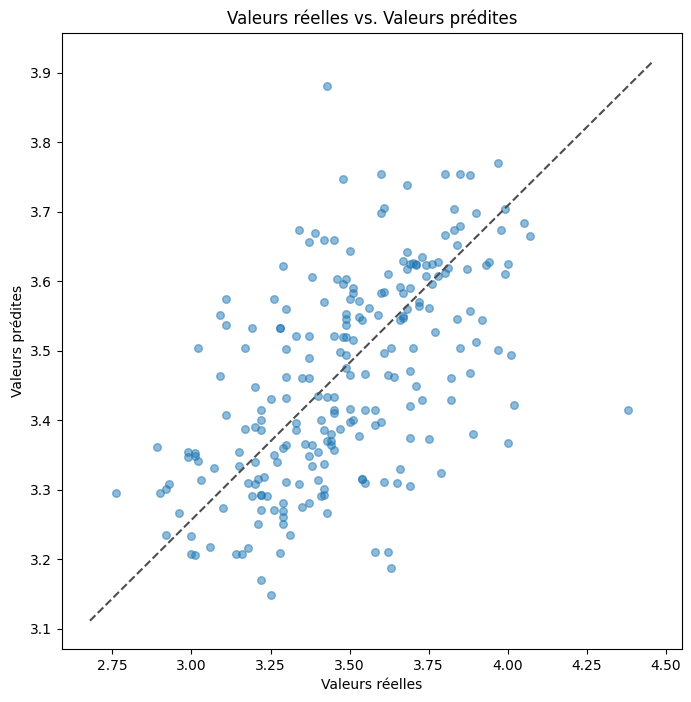

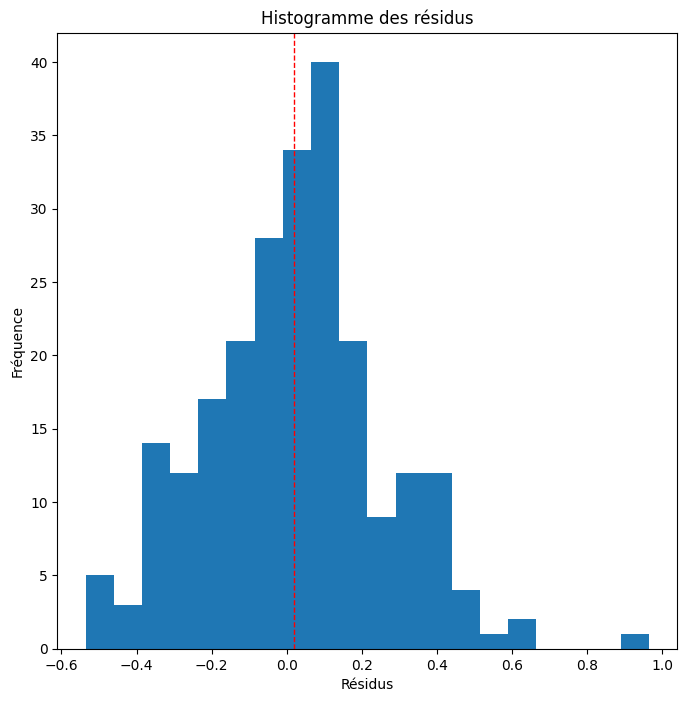

In [72]:
param_grid = {'C': c_values, 
              'epsilon': [0.01, 0.1, 1]}
grid = GridSearchCV(SVR(kernel='linear'), param_grid=param_grid, cv=5)

grid.fit(X_train, y_train.values.ravel())
y_pred = grid.predict(X_test)
y_true = y_test.values.ravel()
mse = np.mean((y_true- y_pred) ** 2)
rmse = np.sqrt(mse)

print("RMSE", rmse)
print("MSE", mse)
print("Best hyperparameters: ", grid.best_params_)
print("Cross-validation score: ", grid.best_score_)
plot_true_vs_predicted(y_true, y_pred)
plot_residuals(y_true, y_pred)


RMSE 0.20911838542898842
MSE 0.04373049912442696
Best hyperparameters:  {'C': 1.5848931924611136, 'epsilon': 0.1, 'gamma': 'auto'}
Cross-validation score:  0.39892695513948573


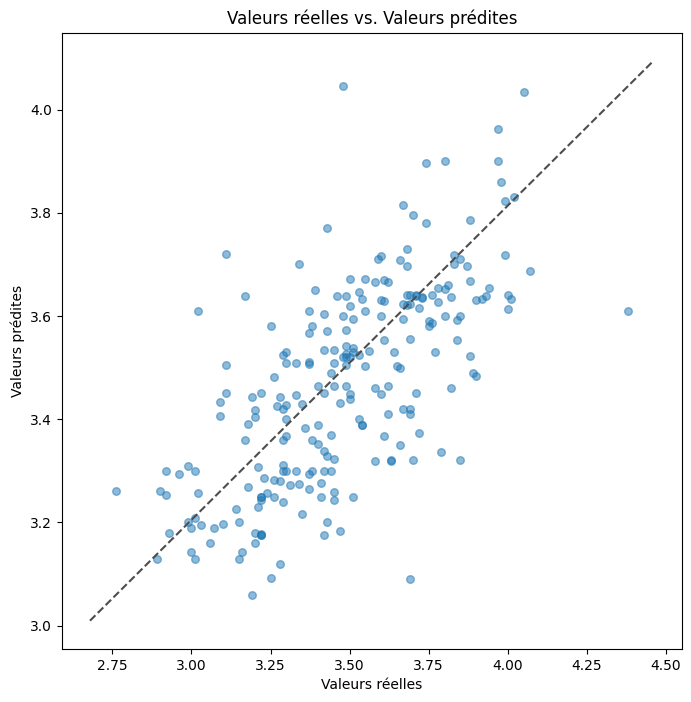

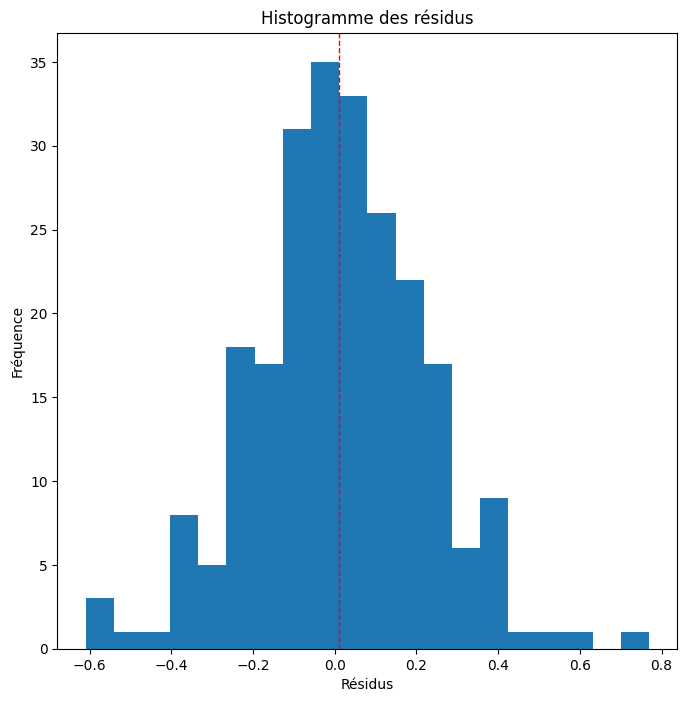

In [73]:
param_grid = {'C': c_values, 
              'epsilon': [0.01, 0.1, 1],
              'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv=5)

grid.fit(X_train, y_train.values.ravel())
y_pred = grid.predict(X_test)
y_true = y_test.values.ravel()
mse = np.mean((y_true- y_pred) ** 2)
rmse = np.sqrt(mse)

print("RMSE", rmse)
print("MSE", mse)

print("Best hyperparameters: ", grid.best_params_)
print("Cross-validation score: ", grid.best_score_)
plot_true_vs_predicted(y_true, y_pred)
plot_residuals(y_true, y_pred)


RMSE 0.21359169415995802
MSE 0.04562141181412105
Best hyperparameters:  {'C': 1.5848931924611136, 'degree': 2, 'epsilon': 0.1}
Cross-validation score:  0.3711307589381318


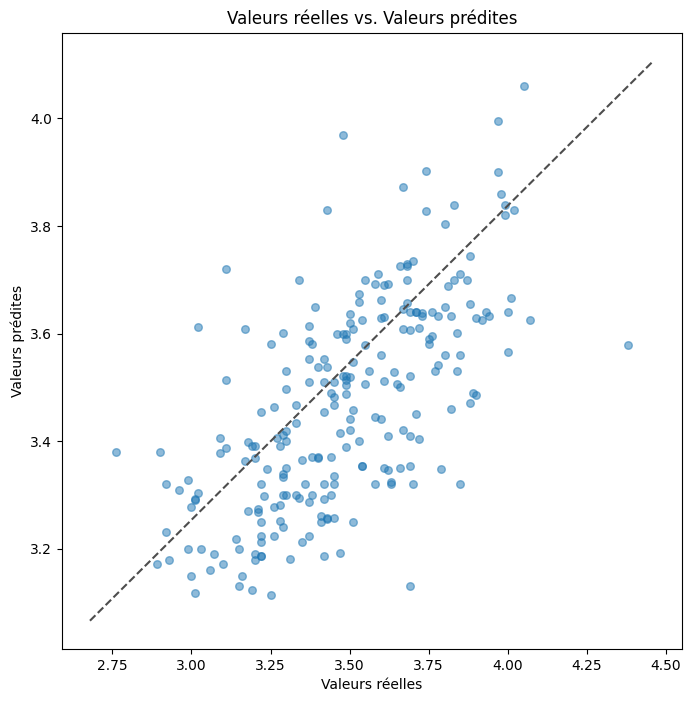

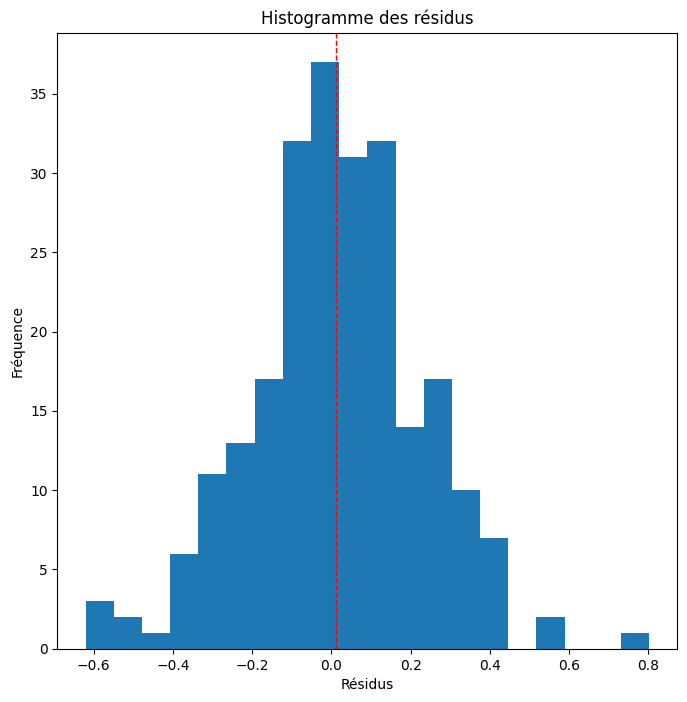

In [74]:
param_grid = {'C': c_values, 
              'epsilon': [0.01, 0.1, 1],
              'degree':[2,3,4,5,6,7]}
grid = GridSearchCV(SVR(kernel='poly'), param_grid=param_grid, cv=5)

grid.fit(X_train, y_train.values.ravel())
y_pred = grid.predict(X_test)
y_true = y_test.values.ravel()
mse = np.mean((y_true- y_pred) ** 2)
rmse = np.sqrt(mse)

print("RMSE", rmse)

print("MSE", mse)
print("Best hyperparameters: ", grid.best_params_)
print("Cross-validation score: ", grid.best_score_)
plot_true_vs_predicted(y_true, y_pred)
plot_residuals(y_true, y_pred)

RMSE 0.2703567562867629
MSE 0.07309277566990012
Best hyperparameters:  {'C': 0.001, 'epsilon': 0.01}
Cross-validation score:  0.05419855071577191


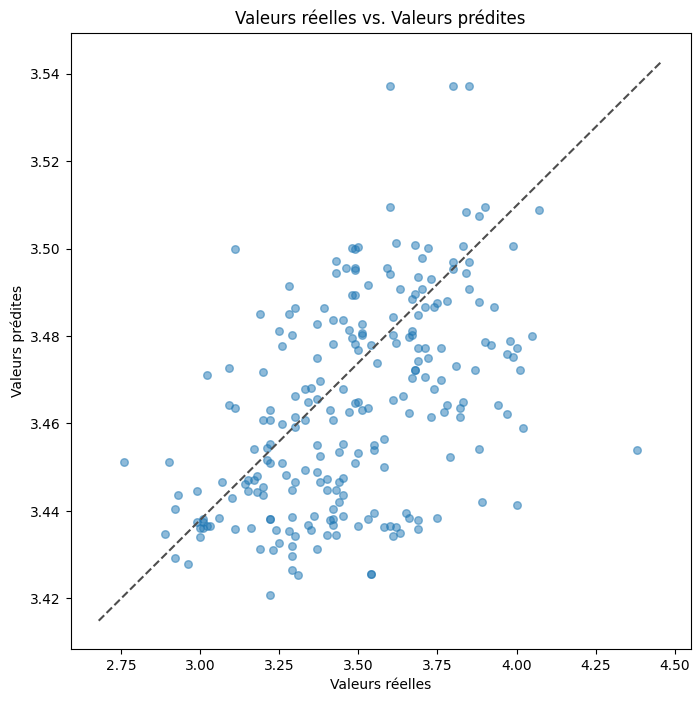

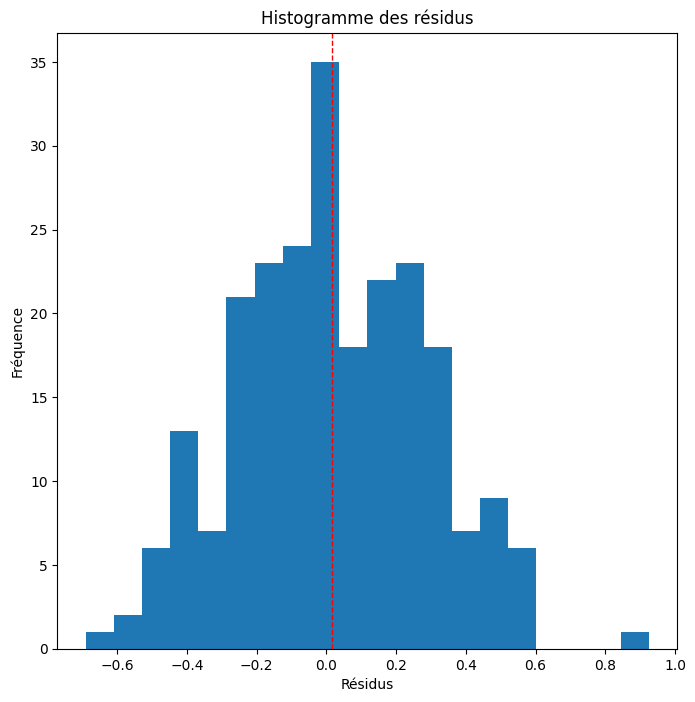

In [75]:
param_grid = {'C': c_values, 
              'epsilon': [0.01, 0.1, 1]}
grid = GridSearchCV(SVR(kernel='sigmoid'), param_grid=param_grid, cv=5)

grid.fit(X_train, y_train.values.ravel())
y_pred = grid.predict(X_test)
y_true = y_test.values.ravel()
mse = np.mean((y_true- y_pred) ** 2)
rmse = np.sqrt(mse)

print("RMSE", rmse)

print("MSE", mse)
print("Best hyperparameters: ", grid.best_params_)
print("Cross-validation score: ", grid.best_score_)
plot_true_vs_predicted(y_true, y_pred)
plot_residuals(y_true, y_pred)

RMSE 0.23652781328622566
MSE 0.05594540645796363
Best hyperparameters:  {'alpha': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Cross-validation score:  -0.05535324849039023


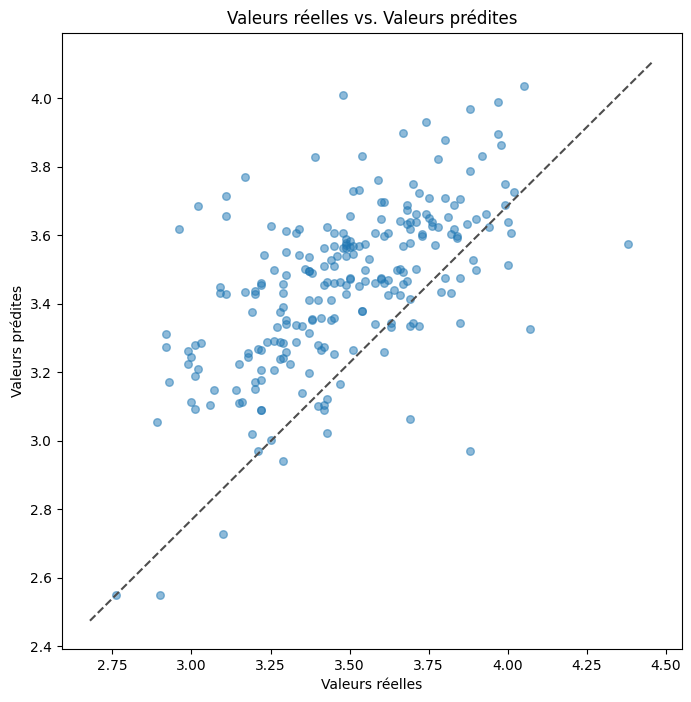

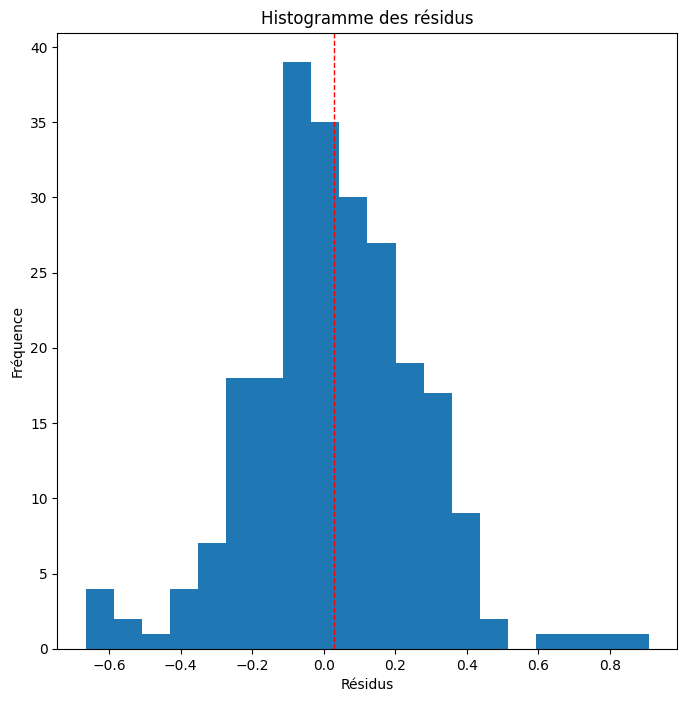

In [76]:
#kernel ridge regression
from sklearn.kernel_ridge import KernelRidge

param_grid = {    'alpha': [0.1, 0.5, 1.0],  # Paramètre de régularisation
    'kernel': ['linear', 'rbf'],  # Type de noyau
    'gamma': [0.01, 0.1, 1.0]  # Paramètre du noyau rbf
    }
grid = GridSearchCV(KernelRidge(), param_grid=param_grid, cv=5, n_jobs=-1)

grid.fit(X_train, y_train.values.ravel())
y_pred = grid.predict(X_test)
y_true = y_test.values.ravel()
mse = np.mean((y_true- y_pred) ** 2)
rmse = np.sqrt(mse)

print("RMSE", rmse)

print("MSE", mse)
print("Best hyperparameters: ", grid.best_params_)
print("Cross-validation score: ", grid.best_score_)
plot_true_vs_predicted(y_true, y_pred)
plot_residuals(y_true, y_pred)